In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
netflix = pd.read_csv('netflix_titles.csv')

In [8]:
netflix['date_added'] = netflix['date_added'].str.strip()

In [9]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], errors='coerce')


In [14]:
print(netflix.info())
print(netflix['type'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB
None
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


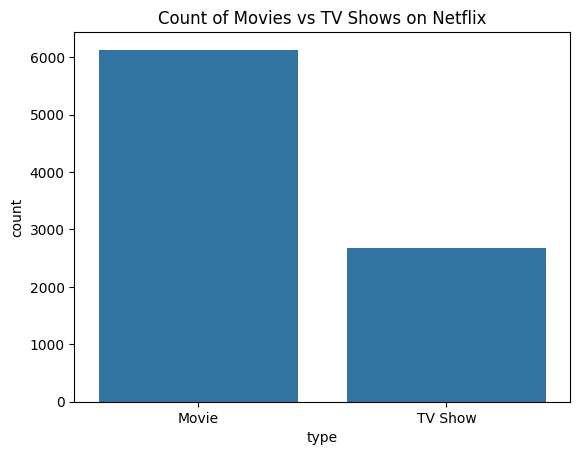

In [17]:
sns.countplot(data=netflix, x='type')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.show()

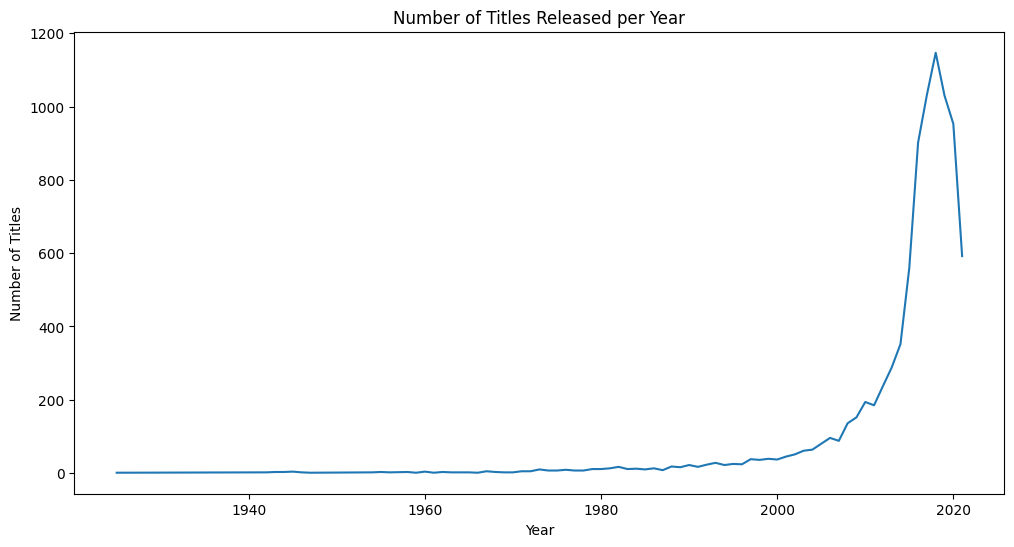

In [19]:
netflix['release_year'].value_counts().sort_index().plot(kind='line', figsize=(12,6))
plt.title('Number of Titles Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

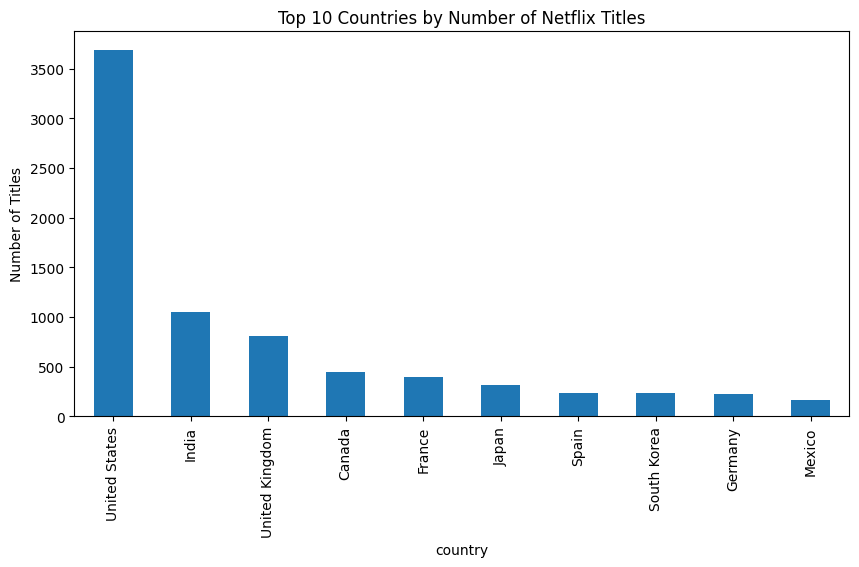

In [20]:
top_countries = netflix['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)
top_countries.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.ylabel('Number of Titles')
plt.show()

In [24]:
netflix_no_mexico = netflix[~netflix['country'].str.contains('Mexico', na=False)]


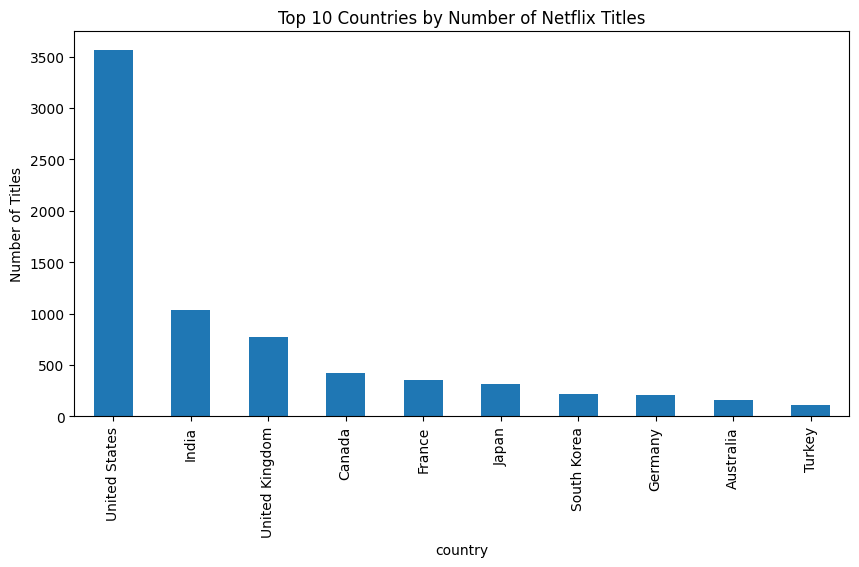

In [33]:
top_countries = netflix_filtered ['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)
top_countries.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.ylabel('Number of Titles')
plt.show()

In [32]:
netflix_filtered = netflix.query("not country.str.contains('Mexico|China|Spain|Egypt', case=False, na=False)", engine='python')

In [34]:
netflix['country'] = netflix['country'].fillna('')

# Split countries by comma and explode into separate rows
netflix_exp = netflix.assign(country=netflix['country'].str.split(',')).explode('country')

# Remove leading/trailing spaces
netflix_exp['country'] = netflix_exp['country'].str.strip()

# Count number of movies per country
country_counts = netflix_exp['country'].value_counts()

# Filter countries with at least 1000 movies
countries_to_keep = country_counts[country_counts >= 1000].index.tolist()

In [36]:
top_countries = countries_to_keep ['country'].dropna().str.split(',').explode().str.strip().value_counts().head(10)
top_countries.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.ylabel('Number of Titles')
plt.show()

TypeError: list indices must be integers or slices, not str

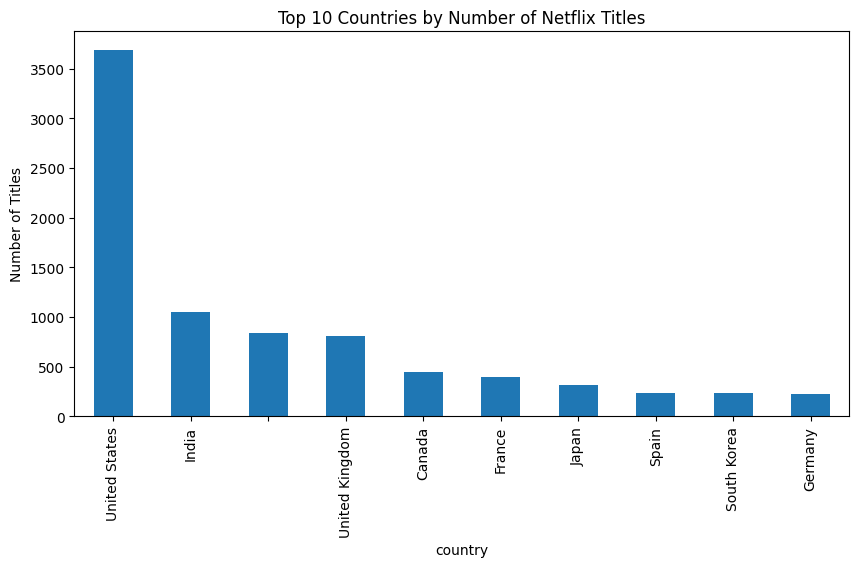

In [37]:
top_countries = netflix_exp['country'].dropna().str.strip().value_counts().head(10)

# Plot top 10 countries
top_countries.plot(kind='bar', figsize=(10,5))
plt.title('Top 10 Countries by Number of Netflix Titles')
plt.ylabel('Number of Titles')
plt.show()

Top country
country
United States    3690
India            1046
                  838
Name: count, dtype: int64


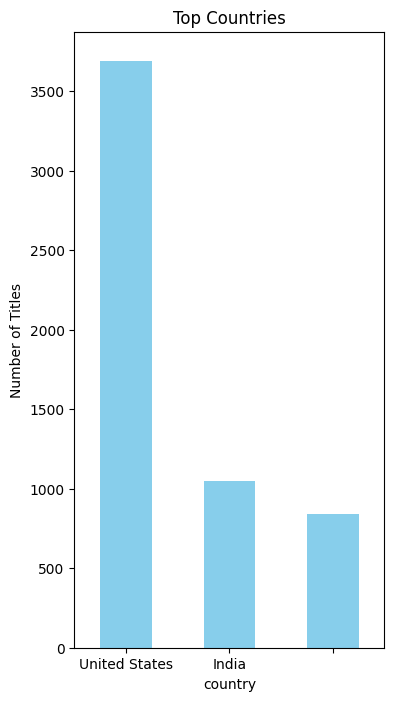

In [45]:
# Fill missing countries
netflix['country'] = netflix['country'].fillna('')

# Explode countries into separate rows
netflix_exp = netflix.assign(country=netflix['country'].str.split(',')).explode('country')

# Strip whitespace
netflix_exp['country'] = netflix_exp['country'].str.strip()

# Count titles per country
country_counts = netflix_exp['country'].value_counts()

# Get the top 1 country
top_country = country_counts.head(3)

# Print the top country and its count
print("Top country")
print(top_country)

# Plot the top country (single bar)
top_country.plot(kind='bar', figsize=(4,8), color='skyblue')
plt.title('Top Countries')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.show()

In [46]:
# Some director entries might be missing, so fill NaN with empty string or drop them
netflix['director'] = netflix['director'].fillna('')

# Since some entries might have multiple directors separated by commas, split and explode
directors_expanded = netflix.assign(director=netflix['director'].str.split(',')).explode('director')

# Remove leading/trailing spaces from director names
directors_expanded['director'] = directors_expanded['director'].str.strip()

# Count movies per director
director_counts = directors_expanded['director'].value_counts()

# Show the top directors with most movies
print(director_counts.head(10))

director
                       2634
Rajiv Chilaka            22
Jan Suter                21
Raúl Campos              19
Suhas Kadav              16
Marcus Raboy             16
Jay Karas                15
Cathy Garcia-Molina      13
Youssef Chahine          12
Martin Scorsese          12
Name: count, dtype: int64


In [58]:
import pandas as pd

# Load the dataset
netflix = pd.read_csv('netflix_titles.csv')

# Fill missing values in 'country' column
netflix['country'] = netflix['country'].fillna('')
netflix_american = netflix[netflix['country'].str.contains('United States', case=False)]

# Optional: check directors in the filtered dataset
directors_american = netflix_american['director'].dropna().unique()
print(directors_american)

['Kirsten Johnson' 'Haile Gerima' 'Theodore Melfi' ... 'Abu Bakr Shawky'
 'Mark Risley' 'Peter Hewitt']


In [70]:
# Print the number of titles

for director in directors_american[:5]:print(director)


Kirsten Johnson
Haile Gerima
Theodore Melfi
Dennis Dugan
Scott Stewart
